<a href="https://colab.research.google.com/github/NDsasuke/Gradient-decent--simplex-method--Binary-linear-programming/blob/main/Gradient%20Descent/Logistic_Regression_with_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries:

* numpy for numerical computations.
* sklearn.datasets.load_breast_cancer to load the Breast Cancer Wisconsin (Diagnostic) dataset.
* sklearn.preprocessing.StandardScaler to standardize the features.
* matplotlib.pyplot for data visualizatio

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

Loading the Breast Cancer dataset:

* The dataset is loaded using load_breast_cancer() from sklearn.datasets.
* The features are stored in X, and the binary labels indicating the diagnosis (malignant or benign) are stored in y.

In [3]:
# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

Standardizing the features:

* The StandardScaler is initialized to scale the features.
* The features in X are transformed using fit_transform() to have zero mean and unit variance.


In [4]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

Adding a bias term to the feature matrix:

* A column of ones is added to the left of X using np.c_[].
* The modified feature matrix is stored in X_b.


In [5]:
# Add bias term to X
X_b = np.c_[np.ones((X.shape[0], 1)), X]

Setting learning rate and number of iterations:

* The learning rate determines the step size for each update during gradient descent.
* learning_rate is set to 0.01, but you can adjust it as needed.
* n_iterations defines the number of iterations to perform during gradient descent.

In [6]:
# Set learning rate and number of iterations
learning_rate = 0.01
n_iterations = 1000

Initializing random weights:

* The random seed is set to ensure reproducibility.
* Random weights are generated using np.random.randn() based on the number of features.

In [7]:
# Initialize random weights
np.random.seed(42)
theta = np.random.randn(X_b.shape[1], 1)

Sigmoid function:

* The sigmoid function is defined to compute the sigmoid activation.
* It returns the value between 0 and 1, which represents the probability of the positive class.

In [8]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Performing gradient descent:

* A loop is used to iterate over the specified number of iterations.
* Logits are calculated using the dot product of X_b and the current weights.
* Probabilities are computed by applying the sigmoid function to the logits.
* Gradients are calculated using the cross-entropy loss function and the current weights.
* The weights are updated using gradient descent by subtracting the product of the learning rate and the gradients.

In [9]:
# Perform gradient descent
for iteration in range(n_iterations):
    logits = X_b.dot(theta)
    y_proba = sigmoid(logits)
    gradients = 1 / X_b.shape[0] * X_b.T.dot(y_proba - y.reshape(-1, 1))
    theta = theta - learning_rate * gradients

Generating predictions:

* Probabilities are computed using the sigmoid function and the trained model.
* A threshold of 0.5 is applied to classify instances as 0 or 1.

In [10]:
# Print the final model parameters
print("Intercept:", theta[0][0])
print("Coefficients:", theta[1:].flatten())

Intercept: 0.3194030016790812
Coefficients: [-0.4480619   0.16283709  1.21952236 -0.49671862 -0.27026827  1.50202303
  0.55148675 -0.703113    0.59951794 -0.24407107 -0.36134216  0.34157433
 -1.76202182 -1.72139456 -0.24451774 -0.74687441  0.42408779 -0.70621332
 -0.92854916  1.69740565 -0.54406251 -0.55515722 -1.72246759 -0.79925549
 -0.17693654 -1.32941189  0.05849946 -0.94528782 -0.438671   -0.7333506 ]


Printing the final model parameters:

* The intercept (bias term) and coefficients are printed from theta.

In [11]:
# Generate predictions
y_pred = (sigmoid(X_b.dot(theta)) >= 0.5).astype(int)

Plotting the original data and the decision boundary:

* The original data points are plotted with different colors for each class.
* The decision boundary is computed from the learned parameters and plotted to separate the classes.

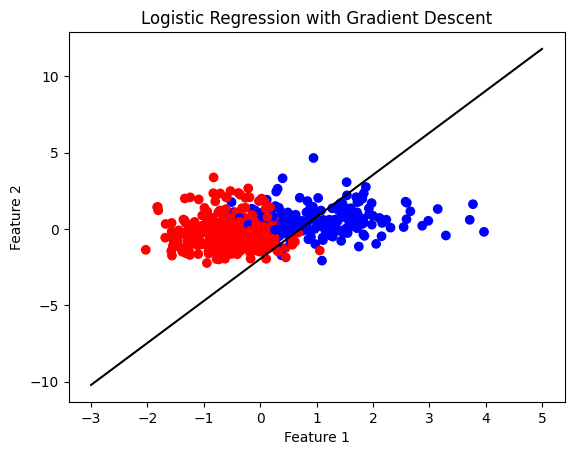

In [12]:
# Plot the original data and the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
x1 = np.linspace(-3, 5, 100)
x2 = -(theta[0][0] + theta[1][0] * x1) / theta[2][0]
plt.plot(x1, x2, color='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression with Gradient Descent')
plt.show()
